In [62]:
# Data Handling
#===================
import pandas as pd

# Data Handling
#===================
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
#===================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

In [63]:
# read the csv file groceries-groceries.csv

df = pd.read_csv('groceries - groceries.csv')

In [64]:
#drop the col Item(s)
df.drop('Item(s)', axis=1, inplace=True)

In [65]:
# make each row into a list, dont include the nan values
df = df.apply(lambda x: x.dropna().tolist(), axis=1)
# df

# get the unique items
unique_items = set()
for i in df:
    for j in i:
        unique_items.add(j)

# assign a number to each item
unique_items = list(unique_items)
unique_items_dict = {unique_items[i]: i for i in range(len(unique_items))}

# instead of strings , use numbers to represent the items in the df
df = df.apply(lambda x: [unique_items_dict[i] for i in x])
# df

# make the list as string example 23, 45, 67. so now each row is a string
df = df.apply(lambda x: ', '.join(map(str, x)))
df

0                                         23, 13, 113, 64
1                                            100, 115, 38
2                                                     118
3                                        140, 115, 49, 69
4                                         158, 118, 27, 7
                              ...                        
9830    45, 119, 59, 117, 23, 151, 135, 118, 67, 122, ...
9831                                                   98
9832           119, 23, 158, 67, 115, 21, 166, 88, 68, 37
9833                                     13, 130, 48, 160
9834                               119, 100, 158, 96, 138
Length: 9835, dtype: object

In [66]:
df_ = pd.DataFrame(df)
df_
# set the column name to ItemName
df_.columns = ['ItemName']

In [70]:
df_
df = df_
df

,ItemName
0,"23, 13, 113, 64"
1,"100, 115, 38"
2,118
3,"140, 115, 49, 69"
4,"158, 118, 27, 7"
...,...
9830,"45, 119, 59, 117, 23, 151, 135, 118, 67, 122, ..."
9831,98
9832,"119, 23, 158, 67, 115, 21, 166, 88, 68, 37"
9833,"13, 130, 48, 160"


In [68]:
# randomly select 150 transactions
transactions = df.sample(150, random_state=42)
transactions_ = transactions.copy()

In [69]:
items_df = transactions['ItemName'].str.split(', ', expand=True).applymap(lambda x: x.strip() if x else x)

# items_df.shape
print(items_df)

       0     1     2     3     4     5     6     7     8     9     10    11  \
9757  118    55    63    50  None  None  None  None  None  None  None  None   
9709  133   115    38  None  None  None  None  None  None  None  None  None   
2588  133   158    88  None  None  None  None  None  None  None  None  None   
6451    3  None  None  None  None  None  None  None  None  None  None  None   
518   158   115  None  None  None  None  None  None  None  None  None  None   
...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
6205  100   140  None  None  None  None  None  None  None  None  None  None   
2055   35   158   118    95  None  None  None  None  None  None  None  None   
3566  138  None  None  None  None  None  None  None  None  None  None  None   
9553   45   100   115     3   114    31  None  None  None  None  None  None   
8686  119   135   158    38   142    24   111    37    33    74  None  None   

        12    13    14    15    16    17    18    1

In [71]:
# Convert items to boolean columns
df_encoded_1 = pd.get_dummies(items_df, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
df_encoded_1.head()

,1,10,100,101,103,108,110,111,112,113,...,85,86,87,88,89,9,92,93,95,96
9757,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df_binary_1 = df_encoded_1.copy()
# conver true to 1 flase to 0
df_binary_1 = df_binary_1.astype('bool').astype('int')
df_binary_1.head()

,1,10,100,101,103,108,110,111,112,113,...,85,86,87,88,89,9,92,93,95,96
9757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(transactions_df, min_support=0.025, min_confidence=0.5):
    """
    This function encodes the transactions into boolean values, performs association rule mining,
    and returns the resulting rules.
    
    :param transactions_df: DataFrame with transactions where each item is represented in its own column.
    :param min_support: The minimum support for an itemset to be considered frequent.
    :param min_confidence: The minimum confidence for a rule to be considered.
    :return: DataFrame containing the association rules.
    """
    # Convert items to boolean columns
    # df_encoded = df_encoded
    
    # Perform association rule mining
    frequent_itemsets = apriori(df_encoded_1, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return rules

# # Now, use the function and display the association rules
# rules = mine_association_rules(items_df)
# print("Association Rules:")
# print(rules.head())

In [74]:
rules_05 = mine_association_rules(items_df, min_support=0.02)
rules_045 = mine_association_rules(items_df, min_support=0.025)
rules_04 = mine_association_rules(items_df, min_support=0.03)

In [75]:
len(rules_05), len(rules_045), len(rules_04)

(174, 32, 8)

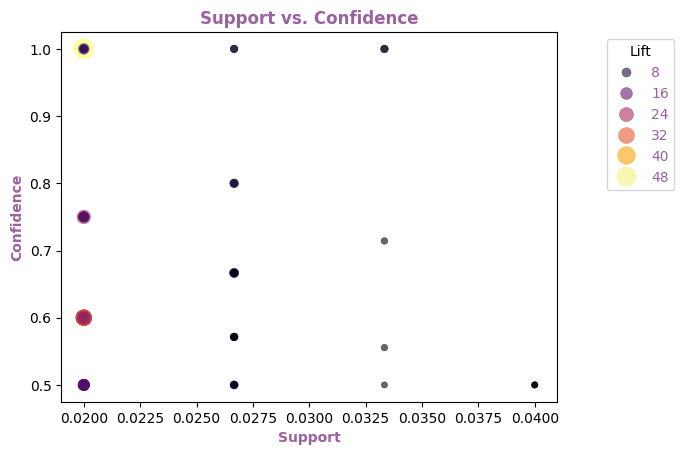

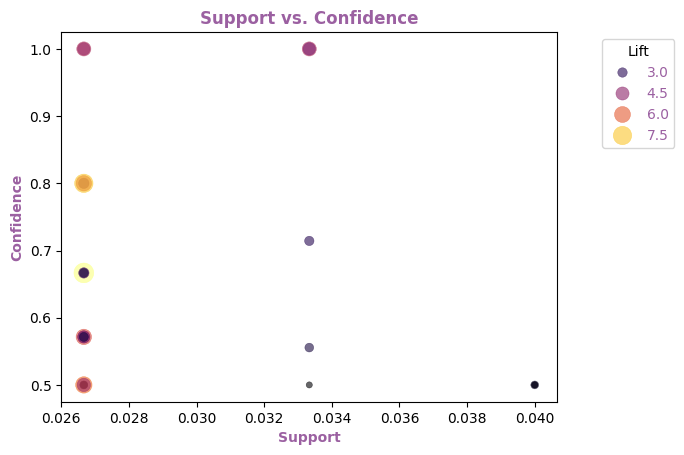

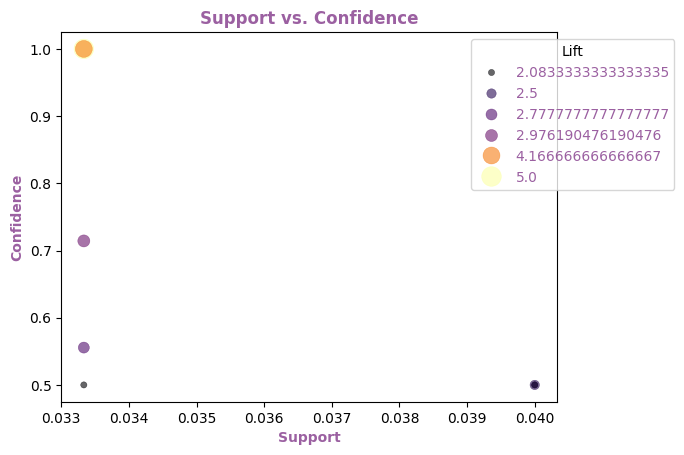

In [76]:


# Plot scatterplot for Support vs. Confidence
def scatter_plot(rules):
    sns.scatterplot(
        x="support",
        y="confidence",
        size="lift",
        data=rules,
        hue="lift",
        palette="inferno", # Color palette
        sizes=(20, 200),
        alpha=0.6,  # Transparency
        edgecolor=None  # Remove edge color for smoother appearance
    )

    # Customize the plot
    plt.title('Support vs. Confidence', color='#9B60A1', fontweight='bold')  # #9B60A1 is purple
    plt.xlabel('Support', color='#9B60A1', fontweight='bold')  
    plt.ylabel('Confidence', color='#9B60A1', fontweight='bold')  
    legend = plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.setp(legend.get_texts(), color='#9B60A1')

    # Show the plot
    plt.show()

scatter_plot(rules_05)
scatter_plot(rules_045)
scatter_plot(rules_04)


In [59]:
def get_rules_to_hide(rules):
    # Sort rules by confidence and lift
    sorted_rules_df = rules.sort_values(by=['confidence', 'lift'], ascending=False)

    # Select top 10% of rules
    top_rules_df = sorted_rules_df.head(int(len(sorted_rules_df) * 0.1))

    # Convert antecedents and consequents into a list of tuples, ready for the GA
    rules_to_hide = [(set(a), set(c)) for a, c in zip(top_rules_df['antecedents'], top_rules_df['consequents'])]
    
    return rules_to_hide

rules_to_hide_05 = get_rules_to_hide(rules_05)
rules_to_hide_045 = get_rules_to_hide(rules_045)
rules_to_hide_04 = get_rules_to_hide(rules_04)

In [60]:
len(rules_to_hide_05), len(rules_to_hide_045), len(rules_to_hide_04)

(17, 3, 0)

In [61]:
def dfing_rules_to_hide(rules_to_hide):
    rules_to_hide_df = pd.DataFrame(rules_to_hide, columns=['antecedents', 'consequents'])
    rules_to_hide_df['antecedents'] = rules_to_hide_df['antecedents'].apply(lambda x: frozenset(x))
    rules_to_hide_df['consequents'] = rules_to_hide_df['consequents'].apply(lambda x: frozenset(x))
    
    return rules_to_hide_df


rules_to_hide_df_05 = dfing_rules_to_hide(rules_to_hide_05)
rules_to_hide_df_045 = dfing_rules_to_hide(rules_to_hide_045)
rules_to_hide_df_04 = dfing_rules_to_hide(rules_to_hide_04)

In [62]:
# csv the rules to hide dfs
rules_to_hide_df_05.to_csv('rules_to_hide_df_05.csv')
rules_to_hide_df_045.to_csv('rules_to_hide_df_045.csv')
rules_to_hide_df_04.to_csv('rules_to_hide_df_04.csv')

In [53]:

transactions_sets = transactions['ItemName'].str.split(', ')
transactions_sets = transactions_sets.apply(lambda x: set(x))
# into a list
transactions_sets = transactions_sets.to_list()

transactions_lists = [list(transaction_set) for transaction_set in transactions_sets]



In [54]:
import cProfile

import random
from collections import defaultdict
from deap import base, creator, tools, algorithms
import numpy
import multiprocessing

def hiding_algo(rules_to_hide):

    # Load dataset and target association rules
    transactions = transactions_lists.copy()

    target_rules = rules_to_hide.copy()

    # Define utility functions
    def get_transactions_with(items, transactions):
        return [t for t in transactions if all(item in t for item in items)]

    def calculate_rule_confidence(rule, transactions):
        lhs, rhs = rule
        lhs_transactions = get_transactions_with(lhs, transactions)
        rhs_transactions = get_transactions_with(rhs, transactions)
        lhs_and_rhs_transactions = get_transactions_with(lhs.union(rhs), transactions)
        if len(lhs_transactions) == 0:
            return 0
        return len(lhs_and_rhs_transactions) / len(lhs_transactions)

    def apply_modifications(transactions, individual):
        modified_transactions = []
        for transaction in transactions:
            modified_transaction = transaction.copy()  # Start with a copy of the original transaction
            for rule in target_rules:
                lhs, rhs = rule
                for item in transaction:  # Iterate over the original transaction to avoid iteration issues
                    if item in lhs or item in rhs:
                        modification_index = transactions.index(transaction) * len(transaction) + transaction.index(item)
                        modification = individual[modification_index]
                        if modification == 1 and item in lhs and item in modified_transaction:
                            modified_transaction.remove(item)
                        elif modification == 2 and item in rhs and item in modified_transaction:
                            modified_transaction.remove(item)
                        elif modification == 3:
                            if item in lhs and item in modified_transaction:
                                modified_transaction.remove(item)
                            if item in rhs and item in modified_transaction:  # Check again as it may have been removed
                                modified_transaction.remove(item)
            modified_transactions.append(modified_transaction)
        return modified_transactions


    # Define fitness function
    creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    alpha = 0.7
    beta = 0.3
    # max_modifications = sum(len(t) for t in transactions)
    max_modifications = len(transactions_lists)
    # target_confidence = 0.03  # Adjust this value to set the desired maximum confidence for the target rules
    lower_target_confidence = 0.1  # Example lower bound
    upper_target_confidence = 0.4  # Example upper bound





    def evaluate_individual(individual):
        modified_dataset = apply_modifications(transactions, individual)
        new_confidences = [calculate_rule_confidence(rule, modified_dataset) for rule in target_rules]
        
        def confidence_penalty(confidence):
            if lower_target_confidence <= confidence <= upper_target_confidence:
                return 0  # No penalty if within the target range
            elif confidence < lower_target_confidence:
                return lower_target_confidence - confidence  # Penalty for being below the range
            else:
                return confidence - upper_target_confidence  # Penalty for being above the range

        avg_penalty = sum(confidence_penalty(conf) for conf in new_confidences) / len(new_confidences)
        
        num_modifications = sum([individual[i] != 0 for i in range(len(individual))])
        utility_score = num_modifications / max_modifications
        
        # Adjust alpha and beta as necessary to balance between penalty and utility preservation
        combined_score = (1 - avg_penalty) * alpha + utility_score * beta
        
        return combined_score, combined_score

    # Define genetic operators
    toolbox = base.Toolbox()

    # pool = multiprocessing.Pool(processes=3)
    # toolbox.register("map", pool.map)

    toolbox.register("attr_int", random.randint, 0, 3)  # 0: do nothing, 1: remove 'a', 2: remove 'b', 3: remove both
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=len(transactions) * max(len(t) for t in transactions))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate_individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutUniformInt, low=0, up=3, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=4)

    # Run genetic algorithm
    population_size = 300
    max_generations = 200
    pop = toolbox.population(n=population_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=max_generations, stats=stats, verbose=True)

    # pool.close()

    # Find best individual
    best_individual = tools.selBest(pop, 1)[0]

    # Apply modifications to dataset
    modified_dataset = apply_modifications(transactions, best_individual)

    # Calculate resulting rule confidences
    new_confidences = [calculate_rule_confidence(rule, modified_dataset) for rule in target_rules]

    modified_txn_final = apply_modifications(transactions, best_individual)


    target_confidence = lower_target_confidence
    print("\nAnalysis of Trade-off:")
    avg_new_confidence = sum(new_confidences) / len(new_confidences)
    num_modifications = sum([best_individual[i] != 0 for i in range(len(best_individual))])
    print(f"Average Confidence Reduction: {(1 - avg_new_confidence / target_confidence)}")
    print(f"Dataset Utility Preservation: {(max_modifications - num_modifications )/ max_modifications}")

    return modified_txn_final

In [55]:
modified_txn_final_05 = hiding_algo(rules_to_hide_05)
# modified_txn_final_045 = hiding_algo(rules_to_hide_045)
# modified_txn_final_04 = hiding_algo(rules_to_hide_04)

gen	nevals	avg    	std     	min    	max   
0  	300   	31.2403	0.125272	30.9047	31.586
1  	260   	31.3582	0.107126	30.962 	31.644
2  	257   	31.4657	0.0859572	31.177 	31.736
3  	244   	31.5362	0.0803283	31.2347	31.79 
4  	259   	31.6078	0.0859216	31.298 	31.8887
5  	256   	31.6778	0.0826031	31.416 	31.898 
6  	252   	31.746 	0.0736996	31.55  	31.936 
7  	246   	31.8063	0.0751191	31.516 	32.062 
8  	253   	31.8676	0.0698057	31.672 	32.108 
9  	267   	31.9158	0.0764007	31.564 	32.114 
10 	254   	31.9709	0.0786303	31.666 	32.156 
11 	257   	32.0178	0.0801799	31.764 	32.232 
12 	256   	32.0687	0.0760903	31.816 	32.234 
13 	245   	32.1251	0.0720054	31.844 	32.382 
14 	244   	32.1816	0.0780045	31.904 	32.382 
15 	264   	32.2426	0.0712804	31.964 	32.432 
16 	247   	32.2894	0.0711591	31.96  	32.432 
17 	259   	32.3237	0.0744787	32.046 	32.484 
18 	242   	32.371 	0.0684698	32.104 	32.548 
19 	249   	32.4093	0.0727568	32.146 	32.552 
20 	247   	32.4445	0.0754758	32.246 	32.598 
21 	265   	32.4774

In [56]:
modified_txn_final_045 = hiding_algo(rules_to_hide_045)

gen	nevals	avg    	std     	min    	max    
0  	300   	31.2104	0.127639	30.8221	31.5737
1  	258   	31.3381	0.111031	30.9493	31.6673
2  	263   	31.4484	0.0982755	31.1731	31.7494
3  	241   	31.5457	0.0822281	31.2794	31.8216
4  	243   	31.6201	0.0750668	31.3646	31.8748
5  	254   	31.6804	0.0814952	31.3834	31.9034
6  	262   	31.7482	0.0686719	31.5181	31.9238
7  	254   	31.8069	0.0750717	31.5737	32.0313
8  	236   	31.8657	0.0669717	31.6427	32.0573
9  	240   	31.9145	0.0660114	31.6978	32.0597
10 	249   	31.9611	0.0595463	31.7729	32.1001
11 	237   	32.0072	0.0599531	31.7813	32.1721
12 	256   	32.0416	0.0702523	31.7988	32.1941
13 	238   	32.0878	0.0656344	31.8633	32.2262
14 	264   	32.1315	0.0681521	31.8339	32.2755
15 	253   	32.169 	0.0645114	31.913 	32.3332
16 	256   	32.201 	0.0659666	31.8878	32.3572
17 	248   	32.2361	0.0667247	31.986 	32.3572
18 	251   	32.2697	0.0664819	31.9849	32.4132
19 	250   	32.3061	0.0561442	32.0609	32.4253
20 	239   	32.3369	0.0608556	32.0414	32.4835
21 	248   	32

In [57]:
modified_txn_final_04 = hiding_algo(rules_to_hide_04)

gen	nevals	avg    	std     	min   	max    
0  	300   	31.2154	0.130096	30.712	31.5518
1  	240   	31.3381	0.108441	31.0278	31.6227
2  	243   	31.4431	0.0894751	31.164 	31.7527
3  	266   	31.5327	0.0814909	31.2733	31.8027
4  	245   	31.6089	0.0898264	31.3128	31.8957
5  	262   	31.6948	0.0910942	31.3463	31.944 
6  	239   	31.7776	0.0809298	31.5048	32.0583
7  	238   	31.8471	0.0805633	31.6192	32.0841
8  	241   	31.9131	0.0776207	31.6016	32.1101
9  	257   	31.9778	0.0714688	31.7079	32.1362
10 	258   	32.0344	0.0675573	31.7434	32.1728
11 	261   	32.0785	0.0625456	31.8697	32.235 
12 	256   	32.1218	0.0604257	31.8733	32.266 
13 	245   	32.1558	0.0606732	31.9533	32.2854
14 	265   	32.1941	0.0607345	31.9437	32.3393
15 	252   	32.2271	0.0656554	31.8913	32.37  
16 	251   	32.2575	0.0614986	32.0817	32.4051
17 	259   	32.2909	0.0606561	32.0828	32.427 
18 	257   	32.3267	0.0617386	32.1127	32.4453
19 	246   	32.3519	0.0723427	32.0977	32.5153
20 	248   	32.3891	0.0669648	32.1543	32.5153
21 	263   	32.4

In [58]:
modified_txn_final_05_df = pd.DataFrame(modified_txn_final_05)
modified_txn_final_045_df = pd.DataFrame(modified_txn_final_045)
modified_txn_final_04_df = pd.DataFrame(modified_txn_final_04)

In [59]:
modified_txn_final_05_df.to_csv('modified_txn_final_05.csv', index=False)
modified_txn_final_045_df.to_csv('modified_txn_final_045.csv', index=False)
modified_txn_final_04_df.to_csv('modified_txn_final_04.csv', index=False)

In [49]:
transactions_lists_df = pd.DataFrame(transactions_lists)
transactions_lists_df.to_csv('transactions_lists.csv', index=False)